## Assignment on FEC 2016 Election Data

> Μακρυγιάννης Ιάσων - Σωτήριος  <br />
> 8160066  <br />
> Διοικητικής Επιστήμης και Τεχνολογίας  <br />

In this report, we will be analyzing the Election Data from 2016 , where our main canditates are:
- Donland Trump
- Hillary Clinton

### Preparation
At the beginning we will have to create a folder **data** , where we will be storing our following *datas*:
>[Pac Summary 2015-2016](https://www.fec.gov/files/bulk-downloads/2016/webk16.zip) <br />
>[Contributions by Individual](https://www.fec.gov/files/bulk-downloads/2016/indiv16.zip) <br />
>[Contributions by Individual - Headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/indiv_header_file.csv) <br />
>[Contributions from committees to Candidates & independent expenditures](https://www.fec.gov/files/bulk-downloads/2016/pas216.zip) <br /> 
>[Contributions from committees to Candidates & independent expenditures - Headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/pas2_header_file.csv) <br />
>[Canditate Master](https://www.fec.gov/files/bulk-downloads/2016/cn16.zip) <br />
>[Canditate Master - Header](https://www.fec.gov/files/bulk-downloads/data_dictionaries/cn_header_file.csv) <br />
>[Operating Expenditures - headers](https://www.fec.gov/files/bulk-downloads/data_dictionaries/oppexp_header_file.csv) <br />
>[Operating Expenditures 2015-2016](https://www.fec.gov/files/bulk-downloads/2016/oppexp16.zip) <br />
>[Committee Master 2015-2016](https://www.fec.gov/files/bulk-downloads/2016/cm16.zip) <br />
>[Committee Master 2015-2016 - Header](https://www.fec.gov/files/bulk-downloads/data_dictionaries/cm_header_file.csv)<br />
**Guides** <br />
The links are to download fast the datas you will need.Click all above links to recieve the datas.After that
1. Create a folder *data* on the same folder as this Jupyter notebook.
2. Move all the files you've downloaded to the *data* folder.



**Question A**

We will start first by importing important libraries


In [1]:
from bs4 import BeautifulSoup
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)


After that we will write the *paths* for our files

In [2]:
data_pac_summary = 'data/webk16.txt'
data_contri_commites = 'data/itpas2.txt'
data_canditates = 'data/cn.txt'
data_commites_info = 'data/cm.txt'
data_individual_don = 'data/itcont.txt'

data_contri_commites_header = 'data/pas2_header_file.csv'
data_candidates_headers = 'data/cn_header_file.csv'
data_commites_info_headers = 'data/cm_header_file.csv'
data_individual_don_headers = 'data/indiv_header_file.csv'


However it is noticed that a *header file* for PAC Summary doesn't exist. We will use a powerful library called BeautifulSoup so we can collect data from this [page](https://www.fec.gov/campaign-finance-data/pac-and-party-summary-file-description/) which describes PAC Summary with its column. After that we will be giving data types of *str* , except of our column **TTL_RECEIPTS** (which is a float number). 
With this we can handle our files better and have a better efficiency. 

In [3]:
r = requests.get("https://www.fec.gov/campaign-finance-data/pac-and-party-summary-file-description/")
html = r.content
soup = BeautifulSoup(html, 'html.parser')
data_pac_summary_headers = []
for row in soup.table.find_all('tr')[1:]:
    data_pac_summary_headers.append(row.td.text)
    
pac_summary_types = {header : np.str for header in data_pac_summary_headers}
pac_summary_types['TTL_RECEIPTS'] = np.float

After that we will procceed reading our *csv* files.We will begin with our headers,which are empty `DataFrame` and store them to lists. 

In [4]:
canditates_header_df = pd.read_csv(data_candidates_headers)
canditates_header_df = canditates_header_df.columns.tolist()

contri_commites_header_df = pd.read_csv(data_contri_commites_header)
contri_commites_header_df = contri_commites_header_df.columns.tolist()

contri_commites_type = {header : np.str for header in contri_commites_header_df}
contri_commites_type['TRANSACTION_AMT'] = np.float

Having our headers ready,we can procceed on reading our main csvs

In [5]:
canditates_df = pd.read_csv(data_canditates,
                  sep="|",
                  index_col=False,
                  names=canditates_header_df)


pac_summary_df = pd.read_csv(data_pac_summary,
                   sep="|",
                   names=data_pac_summary_headers,
                   index_col=False,
                   dtype=pac_summary_types)


commite_contribution_df = pd.read_csv(data_contri_commites,
                    sep="|",
                    names=contri_commites_header_df,
                    index_col=False,
                    dtype=contri_commites_type)

We will only focus on *Hillary Clinton* and *Donald Trump*.
It's safe to say we can remove others canditates from the *canditates_df* dataframe.According to the [description of Canditate master](https://www.fec.gov/campaign-finance-data/candidate-master-file-description/)
* P = Presendial
* C = Statutory candidate


In [6]:
canditates_df = canditates_df.loc[(canditates_df['CAND_ELECTION_YR'] == 2016) & (canditates_df['CAND_OFFICE'] == 'P') & (canditates_df['CAND_STATUS'] == 'C')]

However we also wanna keep some important columns such as:
* Canditate ID
* Canditate Name
* Canditate Party Affiliation

In [7]:
canditates_df = canditates_df.loc[:,['CAND_ID','CAND_NAME','CAND_PTY_AFFILIATION']]

We will be doing the same for PAC Summary to keep:
* Commitee ID
* Commitee Name
* Commitee Type
* Receipts
* Total Distribution
* Inde. expe.


In [8]:
pac_summary_df = pac_summary_df.loc[:,['CMTE_ID','CMTE_NM','CMTE_TP','TTL_RECEIPTS','TTL_DISB','IND_EXP']]

At last we will do the same commitee contribution dataframe to keep:
* Commitee ID
* Transaction Ammount 
* Transaction Type
* Canditate ID

In [9]:
commite_contribution_df = commite_contribution_df.loc[:,['CMTE_ID','TRANSACTION_TP','TRANSACTION_AMT','CAND_ID']]

We will procced to merging Pac Summary with contributions commitee's.
Pac Summary has the total earnings of each PAC. Commite Contribution has the transaction of each PAC to a commitee.However a PAC might have given a ammount against a canditate ,other than supporting. Candidate dataframe includes the ID of Canditate with his name. We wanna merge PAC Summary with its canditate,but the only way to do it is via *Commite contribution* which share the Canditate ID

In [10]:
commite_contribution_df = pd.merge(commite_contribution_df,pac_summary_df,on='CMTE_ID',how='inner')


Following on mergin with *Canditate dataframe*

In [11]:
commite_contribution_df = pd.merge(commite_contribution_df,canditates_df,on='CAND_ID',how='inner')

However,checking the *Canditate Dataframe* we see Donald's Trump pairing with his vice president.
The same goes on Hilary Clinton.
We will change their name so we can have a better optimazation


In [12]:
commite_contribution_df.loc[commite_contribution_df['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD J.'
commite_contribution_df.loc[commite_contribution_df['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY RODHAM'

At the end ,what we wanna do is make two groups:
* A Dataframe which includes the transactions supporting Donald Trump with the transactions going against Hillary Clinton.
* A Dataframe which includes the transactions supporting Hillary Clinton with the transactions going against Donald Trump

Working on Hillary Clinton first we notice two things
* According to [description of Commitee Contributios](https://www.fec.gov/campaign-finance-data/contributions-committees-candidates-file-description/) the transaction type might be 
- 24A which oppose the canditate
- 24E which support the canditate

Also according to FEC's Docs we notice that:
* Hillary's ID is : [P00003392](https://docquery.fec.gov/cgi-bin/fecimg/?P00003392)
* Donald's ID is : [P80001571](https://docquery.fec.gov/cgi-bin/fecimg/?P80001571) <br />
So according to this we will make our groups

In [13]:
df_against_trump = commite_contribution_df.loc[(commite_contribution_df['TRANSACTION_TP']=='24A') & (commite_contribution_df['CAND_ID'] == 'P80001571')]
df_support_hilary = commite_contribution_df.loc[(commite_contribution_df['TRANSACTION_TP']=='24E') & (commite_contribution_df['CAND_ID'] == 'P00003392')]

df_against_hilary = commite_contribution_df.loc[(commite_contribution_df['TRANSACTION_TP']=='24A') & (commite_contribution_df['CAND_ID'] == 'P00003392')]
df_support_trump = commite_contribution_df.loc[(commite_contribution_df['TRANSACTION_TP']=='24E') & (commite_contribution_df['CAND_ID'] == 'P80001571')]




Our main search is looking for super PACS and PACS which supported the canditate..It is noticed that on [Committess Contribution](https://www.fec.gov/campaign-finance-data/contributions-committees-candidates-file-description/) there is a 'CMTE_TP'. Searching on the web it is found that only Commitees with type O are the super pacs and also N is for PACS ( [Commitees Type](https://www.fec.gov/campaign-finance-data/committee-type-code-descriptions/)). So we will filter the transactions,keeping only the one where the commitee's type is O or N.


In [14]:
df_support_hilary = df_support_hilary.loc[(df_support_hilary['CMTE_TP']=="O")]
df_against_trump = df_against_trump.loc[(df_against_trump['CMTE_TP']=="O") ]

df_support_trump = df_support_trump.loc[(df_support_trump['CMTE_TP']=="O") |(df_support_trump['CMTE_TP']=="N")]
df_against_hilary = df_against_hilary.loc[(df_against_hilary['CMTE_TP']=="O") | (df_against_hilary['CMTE_TP']=="N") ]
                                        

We will merge for each canditates the Transactions

In [15]:
df_hilary_pacs = pd.concat([df_support_hilary,df_against_trump], axis=0)
df_trump_pacs = pd.concat([df_support_trump,df_against_hilary],axis=0)

The only thing left to do is to get the total ammount of transaction for each canditate and find the top super pacs.
For Hillary:

In [16]:
df_hilary_pacs.groupby(['CMTE_ID','TTL_RECEIPTS','CMTE_NM','IND_EXP']).sum('TRANSATION_AMT').sort_values(by='TRANSACTION_AMT',ascending=False).head(5)

,,,,TRANSACTION_AMT
CMTE_ID,TTL_RECEIPTS,CMTE_NM,IND_EXP,
C00495861,1.920658e+08,PRIORITIES USA ACTION,133408056.41,132535920.0
C00603621,1.902490e+07,OUR PRINCIPLES PAC,18327118.77,16353117.0
C00523621,2.420699e+07,UNITED WE CAN,13734221.79,13499952.0
C00615815,1.323263e+07,NEXTGEN CALIFORNIA ACTION COMMITTEE,13063726.45,13240861.0
C00473918,3.668587e+07,WOMEN VOTE!,33167398.37,11627748.0


And then we will check top super PACS supporting Trump

In [17]:
df_trump_pacs.groupby(['CMTE_ID','TTL_RECEIPTS','CMTE_NM','IND_EXP']).sum('TRANSATION_AMT').sort_values(by='TRANSACTION_AMT',ascending=False).head(5)

,,,,TRANSACTION_AMT
CMTE_ID,TTL_RECEIPTS,CMTE_NM,IND_EXP,
C00574533,24996520.04,FUTURE45,24264041.87,24219101.0
C00618876,23616516.94,REBUILDING AMERICA NOW,19817596.85,21197098.0
C00490730,22781720.74,RGA RIGHT DIRECTION PAC,5426475.67,5728857.0
C00575373,20737584.81,MAKE AMERICA NUMBER 1,13432442.89,4376616.0
C00581934,9028596.47,REFORM AMERICA FUND,7270211.79,4058735.0


What we see in these two Dataframes are the top super pacs for our canditates.
The reason they are the tops ,is because they spent the most of money.
According to this [Bloomberg](https://www.bloomberg.com/politics/graphics/2016-presidential-campaign-fundraising/) we can see the similarity on the top packs of Trump.Howerver wecannot say the same for Hillary. That might be because these data's are from November 28th and not until the very end.
However *Priorities USA Action* is indeed the top of the top super PAC supporting Hillary,according to [Washington Post](https://www.washingtonpost.com/news/post-politics/wp/2016/10/25/pro-clinton-super-pac-priorities-usa-action-breaks-fundraising-records/).

**Question B** <br />
Moving on finding the top donors for Hillary and Trump.We have the Individual Contributions on a *txt* file which we have to read.However we must remember that a donor might be supporting a canditate thought a PAC.We will be using datas from the Question A to find out the top 10 donors for our canditate.
First we will be reading the header of Individual Contribution and put them into a list. <br />
**Because of our system's problem on reading the datas ( low disk perfomance ) , we will be cutting some uneccessary columns**!


In [18]:
individual_contr_headers = pd.read_csv(data_individual_don_headers)
individual_contr_headers = individual_contr_headers.loc[:,['CMTE_ID','ENTITY_TP','NAME','STATE','TRANSACTION_DT','TRANSACTION_AMT']]
individual_contr_headers = individual_contr_headers.columns.tolist()

Also we will set the data types on these headers.

In [19]:
individual_contr_type = { header: np.str for header in individual_contr_headers }
individual_contr_type['TRANSACTION_AMT'] = np.float


In [21]:
individual_contr_df = pd.read_csv(data_individual_don, 
                  sep="|", 
                  index_col=False, 
                  names=individual_contr_headers,
                  usecols=[0,6,7,9,13,14],
                  dtype=individual_contr_type)

We will also focus on the transaction above the 0


In [22]:
individual_contr_df = individual_contr_df[individual_contr_df['TRANSACTION_AMT'] > 0]

Since we only care for individual donors we will focus only on individuals or the canditate who supported himself/herself.According to [Contributions by Individual Description](https://www.fec.gov/campaign-finance-data/contributions-individuals-file-description/) we can see on Entity Type that :
* IND = Individual (a person)
* CAN = Candidate


In [23]:
individual_contr_df_copy = individual_contr_df[(individual_contr_df['ENTITY_TP']=='CAN') | (individual_contr_df['ENTITY_TP']=='IND')]

There is no information on which candidate a donation goes to: the only relevant information is the committee.
So, we will need to read also the committee master file 

In [24]:
commitee_master_headers_df =  pd.read_csv(data_commites_info_headers)

And again we will extract and put the columns to a list

In [25]:
commitee_master_headers_df = commitee_master_headers_df.columns.tolist()

Now we will be reading the datas

In [26]:
commit_master_df = pd.read_csv(data_commites_info, 
                  sep="|", 
                  index_col=False, 
                  names=commitee_master_headers_df)

After that we will be merging with Individual Contributions

In [27]:
individual_contr_df_copy = pd.merge(individual_contr_df_copy, 
               commit_master_df[['CMTE_ID', 'CMTE_NM', 'CAND_ID']], 
               on='CMTE_ID', 
               how='inner')

Now what we're gonna to do to make some dataframes with donors from individuals who went to the commitee through PACS.
To do that we will search each row if it belongs to either supporting the canditate or opposing the canditate from the dataframes of question A

In [28]:
forhilary_indiv_pacs = individual_contr_df_copy[individual_contr_df_copy['CMTE_ID'].isin(df_support_hilary['CMTE_ID'])]

In [29]:
agansttrump_indiv_pacs = individual_contr_df_copy[individual_contr_df_copy['CMTE_ID'].isin(df_against_trump['CMTE_ID'])]

And now we will merge the above dataframes into one

In [30]:
hilary_indiv_pacs = pd.concat([forhilary_indiv_pacs,agansttrump_indiv_pacs],axis=0)

Same for Donalnd Trump

In [31]:
fortrump_indiv_pacs = individual_contr_df_copy[individual_contr_df_copy['CMTE_ID'].isin(df_support_trump['CMTE_ID'])]

In [32]:
agansthilary_indiv_pacs = individual_contr_df_copy[individual_contr_df_copy['CMTE_ID'].isin(df_against_hilary['CMTE_ID'])]

In [33]:
trump_indiv_pacs = pd.concat([fortrump_indiv_pacs,agansthilary_indiv_pacs],axis=0)

So now what we wanna do is  merge the *Individual Contribution* dataframe , with the dataset which includes the information on every canditate

In [34]:
individual_contr_df_copy = pd.merge(individual_contr_df_copy, 
               canditates_df[['CAND_ID', 'CAND_NAME', 'CAND_PTY_AFFILIATION']], 
               on='CAND_ID',
               how='inner')

Again we will change the name of Donald Trump and Hillary Clinton , so we can work better

In [35]:
individual_contr_df_copy.loc[individual_contr_df_copy['CAND_NAME'] == 'TRUMP, DONALD J. / MICHAEL R. PENCE ', 'CAND_NAME'] = 'TRUMP, DONALD J.'
individual_contr_df_copy.loc[individual_contr_df_copy['CAND_NAME'] == 'CLINTON, HILLARY RODHAM / TIMOTHY MICHAEL KAINE', 'CAND_NAME'] = 'CLINTON, HILLARY RODHAM'

We wanna focus on Democraticans and Republicans only.So we clear our dataframe

In [36]:
individual_contr_df_copy = individual_contr_df_copy[individual_contr_df_copy['CAND_PTY_AFFILIATION'].isin(['DEM', 'REP'])]

Since Donald Trump and Hillary Clinton were the main two candidates, we’ll prepare a subset that has contributions to their campaigns only.

In [37]:
individual_contr_trumps = individual_contr_df_copy.loc[individual_contr_df_copy['CAND_NAME'].isin(['TRUMP, DONALD J.'])].copy()

And for Hilary:

In [38]:
individual_contr_hilarys = individual_contr_df_copy.loc[individual_contr_df_copy['CAND_NAME'].isin(['CLINTON, HILLARY RODHAM'])].copy()

We will now make two final Dataframes
* One which incldues the individuals donors going directly to Trump,including donors who supported Trump through super pacs.
* One which incldues the individuals donors going directly to Hillary,including donors who supported Hillary through super pacs

In [39]:
individual_contr_hilary_total = pd.concat([individual_contr_hilarys,hilary_indiv_pacs],axis=0)
individual_contr_trump_totals = pd.concat([individual_contr_trumps,trump_indiv_pacs],axis=0)

So our final results for Hilary Clinton is:

In [40]:
individual_contr_hilary_total.groupby(['NAME']).sum('TRANSACTION_AMT').sort_values(by='TRANSACTION_AMT',ascending=False).head(10)

,TRANSACTION_AMT
NAME,
"STEYER, THOMAS F.",179000000.0
"EYCHANER, FRED",58255400.0
"SUSSMAN, DONALD",48000000.0
"SOROS, GEORGE",35204086.0
"MOSKOVITZ, DUSTIN",27125000.0
"SIMONS, JAMES",22000000.0
"BLOOMBERG, MICHAEL R.",21665124.0
"SIMONS, JAMES H.",19500000.0
"PRITZKER, JAY ROBERT",18951696.0


And our final results for Donald Trump is:

In [41]:
individual_contr_trump_totals.groupby('NAME').sum('TRANSACTION_AMT').sort_values(by='TRANSACTION_AMT',ascending=False).head(10)

,TRANSACTION_AMT
NAME,
"ADELSON, MIRIAM",20000000.0
"ADELSON, SHELDON",20000000.0
"MERCER, ROBERT",15500000.0
"MCMAHON, LINDA E.",14000000.0
"MARCUS, BERNARD",12000000.0
"UIHLEIN, RICHARD",10560000.0
"TRUMP, DONALD J",10033637.0
"HENDRICKS, DIANE",8152900.0
"PALMER, GEOFFREY H.",8000000.0


* According to [opensecret's website](https://www.opensecrets.org/outsidespending/summ.php?cycle=2016&disp=D&type=V&superonly=N) we can see some famous names which were indeed the biggest donors such as George Sorros who spent a lot of money on Hillary's campaign. 
* What we also notice is that on Trump's list,his name is also included.According to [USA Today's News's website](https://eu.usatoday.com/story/news/politics/onpolitics/2016/12/08/donald-trumps-campaign-investment-hit-66-million/95178392/) *"Trump contributed another 10 million to his presidential campaign in the closing days of the election"* ,so it's good to say that Donald himself was one of the biggest donor on his campaign <br />

The rest of the list for both of them are mostly businessmen which risked a lot of money on supporting each canditate.<br />
On each case,the names are indeed included to *opensecrets* which is a trustful websites on datas ,such as politics and other categories.

**Question C** <br />
Moving on now we are gonna investigate the chronological evolution of the contributions made to and the expenditures made by the campaigns. <br />
First we are gonna analyse the expenditures from the commitees. Looking on the [bulk dates](https://www.fec.gov/data/browse-data/?tab=bulk-data) from FEC's website,we spot a file called *Operating Expendatures* , which includes a dataset of how committee's money were spent. Looking on its [description](https://www.fec.gov/campaign-finance-data/operating-expenditures-file-description/) we see a column called *CATEGORY* which includes a link on its [category types](https://www.fec.gov/campaign-finance-data/disbursement-category-code-descriptions/). Checking on that link , we can see some codes which interestes us such as:
* 007 = Campaign event expenses
* 006 = Campaign materials
* 102 = Media expenditures
* 103 = Expenditures for mass mailings and other campaign materials (e.g., buttons, bumper stickers, brochures, mass mailings, pens, posters, balloons)
These two codes are the one we are looking for,expendetues by campaign.So we are gonna use them on this file. <br />
First off all we are gonna read its headers and put them into list
* 004 = Advertising expenses -including general public political advertising (e.g., purchases of radio/television broadcast/cable time, print advertisements and related production costs) <br />
Moving on we will start reading our *Operative Expenditures* Dataframe

In [42]:
data_oppexp_headers = 'data/oppexp_header_file.csv'
oppexp_headers = pd.read_csv(data_oppexp_headers)
oppexp_list = oppexp_headers.columns.tolist()



And then give its type for each header

In [43]:
oppexp_types = {header : np.str for header in oppexp_list}
oppexp_types['TRANSACTION_AMT'] = np.float


Now we are gonna read the dataset of operating expenditures

In [44]:
data_oppexp = 'data/oppexp.txt'
oppexp = pd.read_csv(data_oppexp,
                  sep="|",
                  index_col=False,
                  names=oppexp_list,dtype=oppexp_types)


However checking on types,we see that *TRANSACTION_DT* is not a datatime64 type.
This column is important since it includes the date of the expenditure

In [45]:
oppexp.dtypes

CMTE_ID              object
AMNDT_IND            object
RPT_YR               object
RPT_TP               object
IMAGE_NUM            object
LINE_NUM             object
FORM_TP_CD           object
SCHED_TP_CD          object
NAME                 object
CITY                 object
STATE                object
ZIP_CODE             object
TRANSACTION_DT       object
TRANSACTION_AMT     float64
TRANSACTION_PGI      object
PURPOSE              object
CATEGORY             object
CATEGORY_DESC        object
MEMO_CD              object
MEMO_TEXT            object
ENTITY_TP            object
SUB_ID               object
FILE_NUM             object
TRAN_ID              object
BACK_REF_TRAN_ID     object
dtype: object

To fix this,we are gonna change the type of *TRANSACTION_DT*

In [46]:
oppexp['TRANSACTION_DT']= pd.to_datetime(oppexp['TRANSACTION_DT'], errors = 'coerce')

In [47]:
oppexp.dtypes

CMTE_ID                     object
AMNDT_IND                   object
RPT_YR                      object
RPT_TP                      object
IMAGE_NUM                   object
LINE_NUM                    object
FORM_TP_CD                  object
SCHED_TP_CD                 object
NAME                        object
CITY                        object
STATE                       object
ZIP_CODE                    object
TRANSACTION_DT      datetime64[ns]
TRANSACTION_AMT            float64
TRANSACTION_PGI             object
PURPOSE                     object
CATEGORY                    object
CATEGORY_DESC               object
MEMO_CD                     object
MEMO_TEXT                   object
ENTITY_TP                   object
SUB_ID                      object
FILE_NUM                    object
TRAN_ID                     object
BACK_REF_TRAN_ID            object
dtype: object

Now we are gonna check if the dataset is correct about the dates

In [48]:
print(oppexp['TRANSACTION_DT'].dt.strftime("%Y").unique().tolist())

['2015', '2014', '2016', nan, '2005', '2018', '2012', '2008', '2019', '2011', '2017', '2013', '2010', '2020', '2007', '2106', '2116', '2025', '2001', '2006', '2114', '2021']


We notice that some rows have been commited at older ages or after 2016,which seems like there is a fault on the dataset.Since we care only for 2015-2016 we have to filter our dataset to keep these rows which happened between these years

In [49]:
oppexp = oppexp.loc[(oppexp['TRANSACTION_DT'] > '2015-1-1') & (oppexp['TRANSACTION_DT'] <= '2016-12-31')]

And since we also care about the campaign expidantures we will filter again our dataset on *CATEGORY*.We will mostly keep expensives on campagn events or advertisment on the medias according to the codes we found above.

In [50]:
oppexp_copy = oppexp.loc[(oppexp['CATEGORY']=='007') | (oppexp['CATEGORY']=='006')| (oppexp['CATEGORY']=='004')|(oppexp['CATEGORY']=='102') | (oppexp['CATEGORY']=='103')]

Now what we are gonna do is *groupby* the dates and do a sum on the *TRANSACTION_AMT* 

In [51]:
totalexp = oppexp_copy.groupby(oppexp_copy['TRANSACTION_DT'].dt.strftime('%Y/%m')).sum().sort_values(by=['TRANSACTION_DT'])

Our results for each cost per month in summary

In [52]:
totalexp 

,TRANSACTION_AMT
TRANSACTION_DT,
2015/01,689190.02
2015/02,595908.46
2015/03,759324.35
2015/04,1346039.60
2015/05,1166051.47
2015/06,706906.94
2015/07,1999158.48
2015/08,910956.00
2015/09,897579.93


To analyse it better we will represent these datas on a plot

Text(0, 0.5, 'TRANSACTION_AMT')

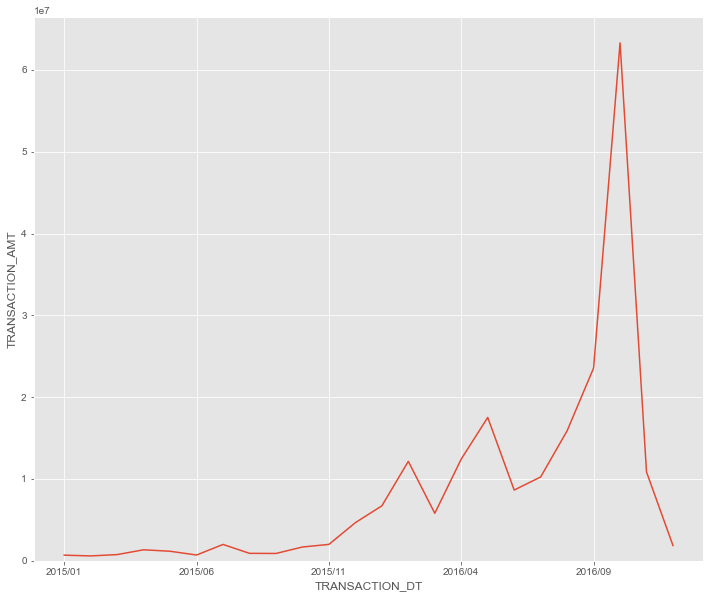

In [53]:
pd.Series(totalexp.TRANSACTION_AMT).plot(figsize=(12, 10)) 
plt.style.use('seaborn')
plt.ylim(0)
plt.xlabel('TRANSACTION_DT') 
plt.ylabel('TRANSACTION_AMT')

Now let's analyse these graphic.
According to [Timeline of the 2016 United States presidential election](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election): <br />
* Between [December](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election#December_2015) and [January](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election#January_2016) we can see that both parties,Republican and Demotratic had their debate. So it's good to say that the expenditures were high on this period. Especially on December, Republican had 5th debate,meanwhile the 3th Democratic's debate also took part. We can see according to this article,that on that period (starting from November) different debates took apart in different states. That's the reason of the peak around December of 2015.
* On around [June](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election#June_2016) we can see that the there was a nomination of *primaries* and *caucasus* , which are groups that supporting the canditate.This explains the rise of the ammount during *May* to *June*.Why is that important? <br >
    * Caucus is [“a meeting of party leaders or party members to select candidates, elect convention delegates, and establish the party’s policy position on specific issues.”](https://www.dictionary.com/e/caucus-vs-primary/)
    * Primary is [“a preliminary election in which voters of each party nominate candidates for office.”](https://www.dictionary.com/e/caucus-vs-primary/) <br />
*It's important for each canditate to win these parties to be nominated as the final canditates for each party,because they are the decision-takers for who is gonna be the final canditate for the parties
* On [September](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election#September_2016) the first debate between Hilary Clinton and Donald Trump took place at Hofstra University in Hempstead, New York.According to the article : *Hillary Clinton ends up taking the majority support after the debate*. So we see the reason of the rising on ammount is because debate took apart.Around May-June,there was a mini election to declare the final nomination on both parties ( Republican and Democratic ) which also causes the rise of ammount
* Last and not least ,we see after September a dramatic rise of the ammount , causing expenditures on peak *3902109.08* which is probably the reason because the election took part on [November](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election#November_2016)


Let's also look at what happened on Hillary Clinton and Donald Trump. <br />
We are gonna keep the rows where the commitee ID is either on Trump's supporter or Hillary's supporter,using the dataframe from *Question A*

In [54]:
fortrumpexp = oppexp_copy[oppexp_copy['CMTE_ID'].isin(df_trump_pacs['CMTE_ID'])]
fortrumpexp = fortrumpexp[(fortrumpexp['TRANSACTION_AMT'] > 0)]
forhilaryexp = oppexp_copy[oppexp_copy['CMTE_ID'].isin(df_hilary_pacs['CMTE_ID'])]
forhilaryexp = forhilaryexp[(forhilaryexp['TRANSACTION_AMT'] > 0)]

And do a *groupby* for each of them by the *date* on *transaction ammount*

In [55]:
totaltrump_exp = fortrumpexp.groupby(fortrumpexp['TRANSACTION_DT'].dt.strftime('%Y/%m')).sum().sort_values(by=['TRANSACTION_DT'])
totalhilary_exp = forhilaryexp.groupby(forhilaryexp['TRANSACTION_DT'].dt.strftime('%Y/%m')).sum().sort_values(by=['TRANSACTION_DT'])


Graph  for Donald Trump:

Text(0, 0.5, 'TRANSACTION_AMT')

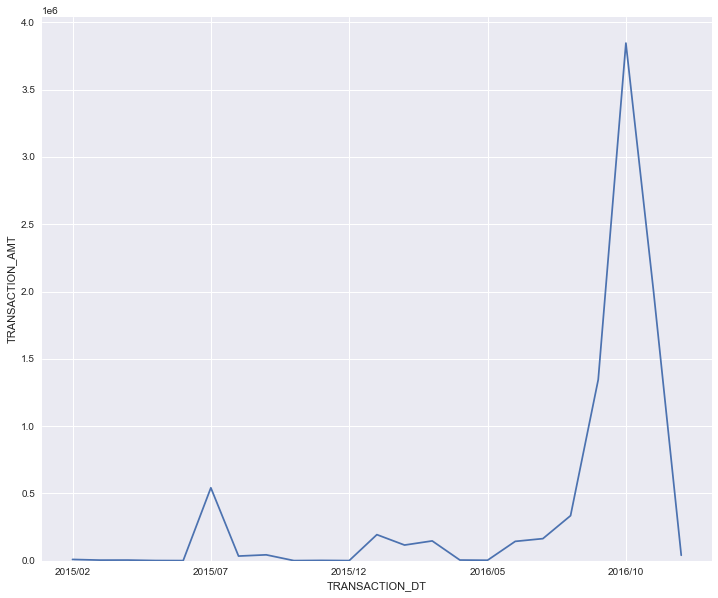

In [56]:
pd.Series(totaltrump_exp.TRANSACTION_AMT).plot(figsize=(12, 10)) 
plt.style.use('seaborn')
plt.ylim(0)
plt.xlabel('TRANSACTION_DT') 
plt.ylabel('TRANSACTION_AMT') 

In [57]:
totaltrump_exp

,TRANSACTION_AMT
TRANSACTION_DT,
2015/02,9969.53
2015/03,5057.40
2015/04,5383.06
2015/05,1998.33
2015/06,1500.00
2015/07,542400.03
2015/08,35097.33
2015/09,44368.63
2015/10,1500.00


Graph for Hilary Clinton

Text(0, 0.5, 'TRANSACTION_AMT')

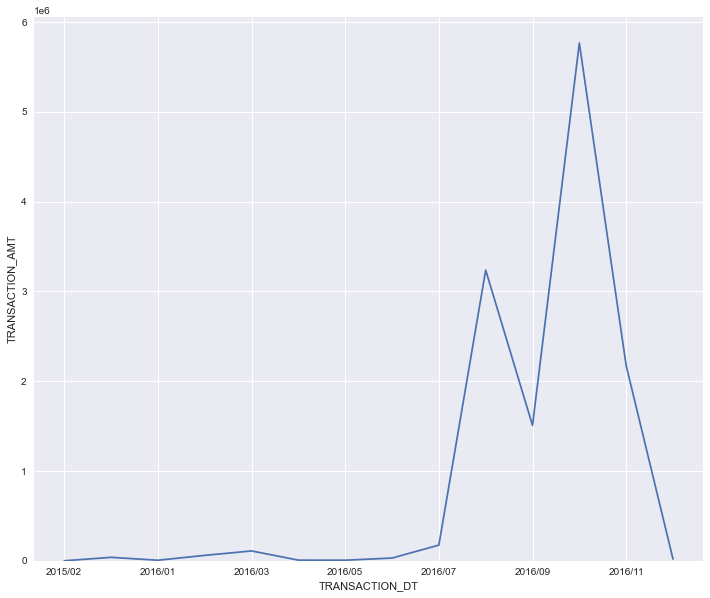

In [58]:
pd.Series(totalhilary_exp.TRANSACTION_AMT).plot(figsize=(12, 10)) 
plt.style.use('seaborn')
plt.ylim(0) 
plt.xlabel('TRANSACTION_DT') 
plt.ylabel('TRANSACTION_AMT') 

In [59]:
totalhilary_exp

,TRANSACTION_AMT
TRANSACTION_DT,
2015/02,354.97
2015/12,38600.00
2016/01,6311.30
2016/02,60445.45
2016/03,109848.95
2016/04,7413.27
2016/05,6632.28
2016/06,30514.00
2016/07,174542.40



What we can see from Graph is that :
* both candidate's expidenture were rising after July,which they were deligated for the final canditate of the parties
* both candidate's peak were before debate took apart. **However** we can see that Donald Trump had the peak on September , which there was the first debate and Hillary's peak was on October,one month before the election day.Thought Hilary won the debate's support ,the real winner of 2016 is Donald Trump. <br /> 
* The ammounts are low before July and the reason is because the final deligates for Republican and Democratic weren't announcent. <br />
* Hillary doesn't have any peak during 2015.The reason might be  because Hillary was already a senerate at 2015,meaning she was known already on politice,likewise Donald Trump who has been known only for business <br />


Going ahead we are gonna check the chronological evolution of incomes.We will work on the same way as we did before.
Reading our data we will notice some *NaN* and some values which are not valid dates.We will handle them as replace them to normals ,old dates,since we will be filtering after

In [60]:
individual_contr_df['TRANSACTION_DT'] = individual_contr_df['TRANSACTION_DT'].replace(np.nan,'01012001')
individual_contr_df['TRANSACTION_DT'] = individual_contr_df['TRANSACTION_DT'].replace('41031', '01012001')

What we are noticing is that our dates are in a  line without seperations.
We're gonna use a function called *strptime* which converts a string to a represating time according to its format.
We will also use *lambda* function to do it for all the rows.

In [61]:
individual_contr_df['TRANSACTION_DT']=individual_contr_df['TRANSACTION_DT'].apply(lambda x: datetime.datetime.strptime(str(x),'%m%d%Y'))


However our column is still in *str* type.To handle these with  a date type we will again convert the whole column to *datetime64*

In [62]:
individual_contr_df['TRANSACTION_DT']= pd.to_datetime(individual_contr_df['TRANSACTION_DT'], errors = 'coerce')

Now we can work as before,but first let's check  for problematic years

In [89]:
print(individual_contr_df['TRANSACTION_DT'].dt.strftime("%Y").unique().tolist())

['2015', '2014', '2001', '2016', '2011', '1916', '2013', '2000', '2025', nan, '2008', '2012', '2019', '2160', '2106', '2010', '2201', '2006', '2017', '2061', '2018']


What we notice is that there are again some years that are problematic,however there isn't any close to 2016 or 2015 to fix.So we can go again by filtering to specific years

In [63]:
individual_contr_df = individual_contr_df.loc[(individual_contr_df['TRANSACTION_DT'] > '2015-1-1') & (individual_contr_df['TRANSACTION_DT'] <= '2016-12-31')]

Now let's do again a groupby dates and get the sum of *TRANSACTION_AMT* 

In [64]:
totalincome = individual_contr_df.groupby(individual_contr_df['TRANSACTION_DT'].dt.strftime('%Y/%m')).sum().sort_values(by=['TRANSACTION_DT'])

And let's do a graph again to have better visualization

Text(0, 0.5, 'TRANSACTION_AMT')

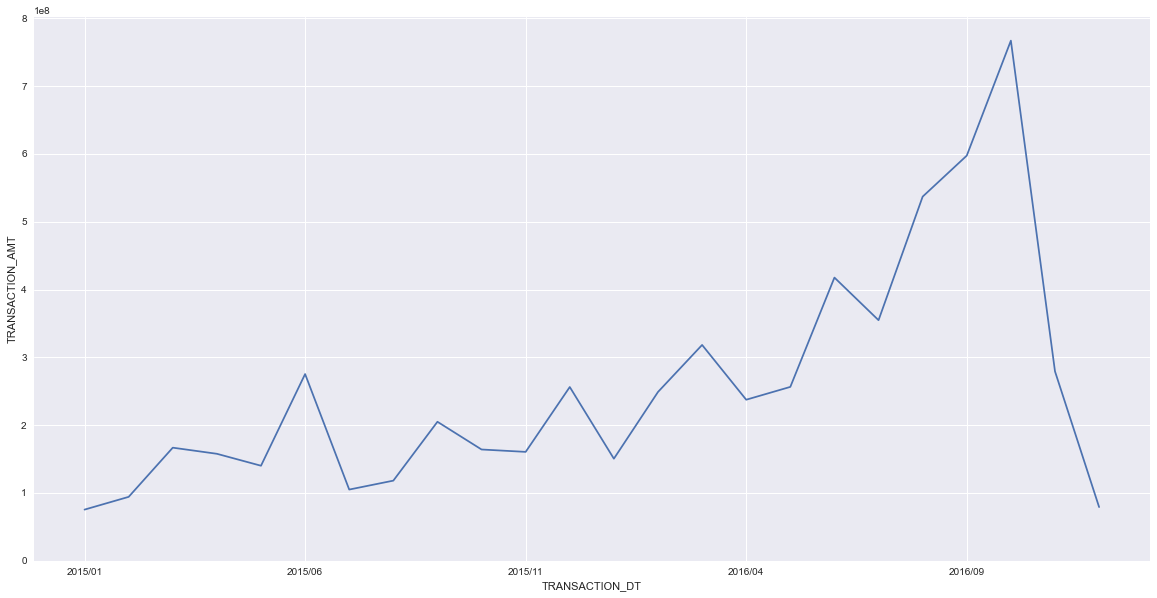

In [65]:
pd.Series(totalincome.TRANSACTION_AMT).plot(figsize=(20, 10))
plt.style.use('seaborn')
plt.ylim(0) 
plt.xlabel('TRANSACTION_DT') 
plt.ylabel('TRANSACTION_AMT')

What we notice here is that the graph is almost same as the expenditures,which means they agree. <br />
It's reasonable to say that the most incomes are in the time where the debates happened and the month before the election day. <br />
Let's check again for each canditate we were looking before

In [66]:
fortrump_inc = individual_contr_df[individual_contr_df['CMTE_ID'].isin(df_trump_pacs['CMTE_ID'])]
hilary_inc = individual_contr_df[individual_contr_df['CMTE_ID'].isin(df_hilary_pacs['CMTE_ID'])]

Doing the *groupby* to get the total sum:

In [67]:
totaltrump_income = fortrump_inc.groupby(fortrump_inc['TRANSACTION_DT'].dt.strftime('%Y/%m')).sum().sort_values(by=['TRANSACTION_DT'])
totalhilary_income = hilary_inc.groupby(hilary_inc['TRANSACTION_DT'].dt.strftime('%Y/%m')).sum().sort_values(by=['TRANSACTION_DT'])

And let's have a graph for each canditate. <br />
First we will check Donald Trump

Text(0, 0.5, 'TRANSACTION_AMT')

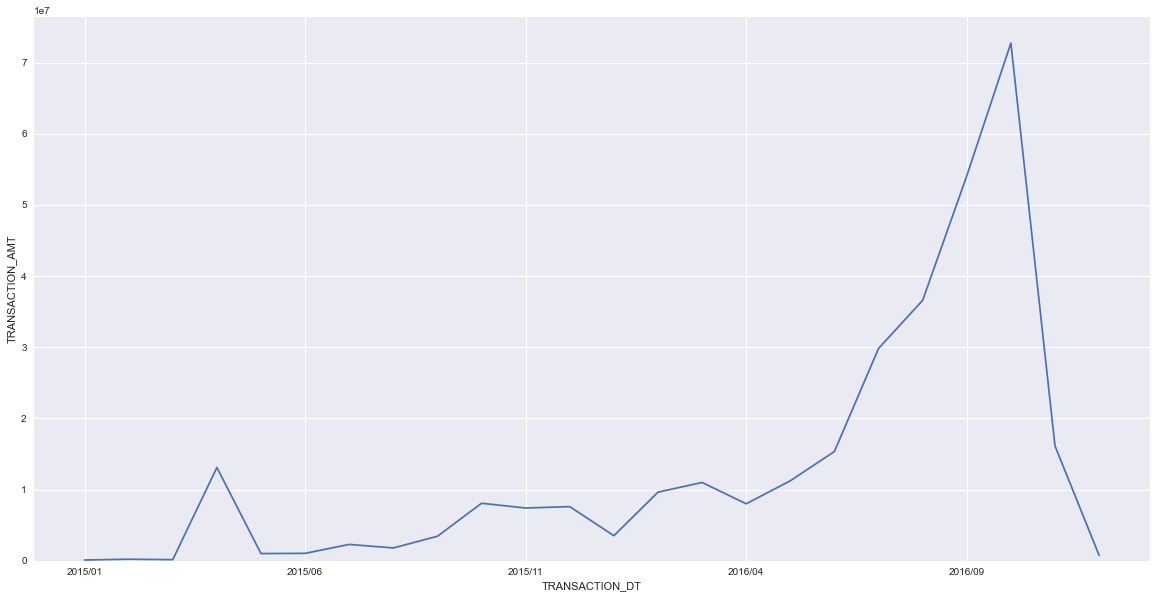

In [68]:
pd.Series(totaltrump_income.TRANSACTION_AMT).plot(figsize=(20, 10)) 
plt.style.use('seaborn')
plt.ylim(0) 
plt.xlabel('TRANSACTION_DT') 
plt.ylabel('TRANSACTION_AMT') 

And then for Hilary Clinton:

Text(0, 0.5, 'TRANSACTION_AMT')

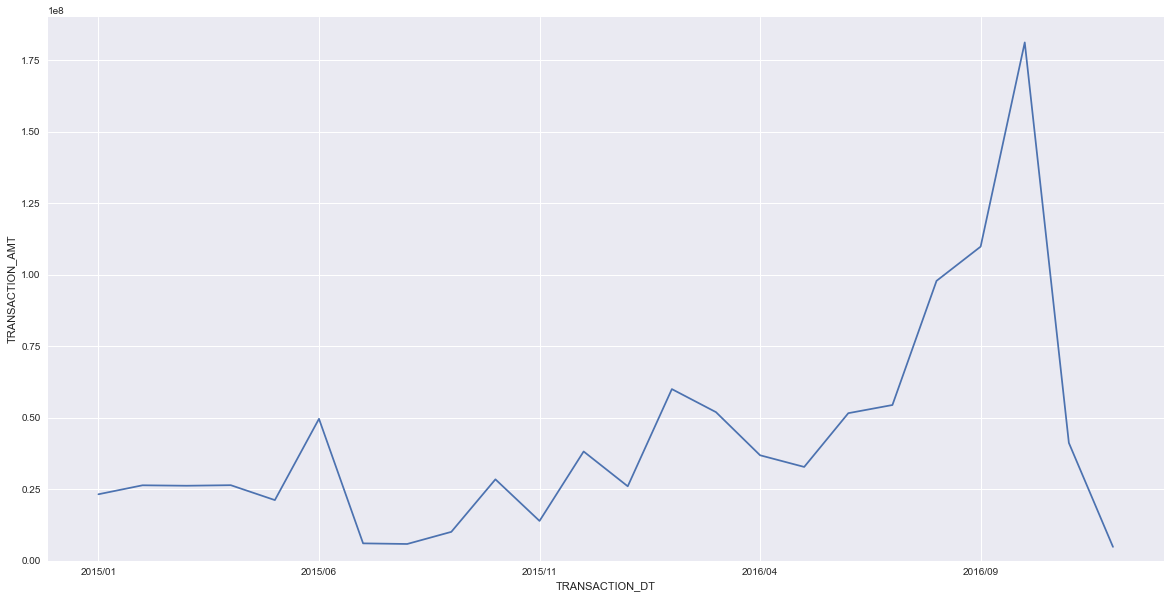

In [69]:
pd.Series(totalhilary_income.TRANSACTION_AMT).plot(figsize=(20, 10)) 
plt.style.use('seaborn')
plt.ylim(0) 
plt.xlabel('TRANSACTION_DT') 
plt.ylabel('TRANSACTION_AMT')

What we notice in both graphs is: <br />
* Most of incomes are around in September-October which is again the month before election dates
* Also a rise of incomes around May , which is because there was the election for the final canditate in each party.
* On Donald's Trump peak on 2015/04 it's the time where Donald Trump ["forms an exploratory committee in preparation for a possible run for president."](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election#March_2015)
* On Hillary's Clinton peak on 2015/05 is the time when she ["formally announces her candidacy for the presidential nomination of the Democratic Party"](https://en.wikipedia.org/wiki/Timeline_of_the_2016_United_States_presidential_election#April_2015)

**Question D**

Moving on we will see about the biggest recipients of campaign expenditures.To do that we will need to use *Operating Expenditures*.However we're gonna see the datas on 3 parts.
* First for all in general
* Datas about Hillary Clinton
* Datas about Donald Trump <br />
So what we need to do is merge our *Operating Expenditures* with *Commitee's Master* and filter our results to have the expenditures on campagns.
First we are gonna read our *Committees Master csv* as we did before

We are gonna make again a copy of *oppexp* to be safe

In [70]:
oppexp_copy_d = oppexp.copy()

We are again gonna convert *TRANSACTION_DT* to datetime type

In [71]:
oppexp_copy_d['TRANSACTION_DT']= pd.to_datetime(oppexp_copy_d['TRANSACTION_DT'], errors = 'coerce')

And now we are gonna merge oppexp with our commitee master dataframe

In [72]:
oppexp_copy_d = pd.merge(oppexp_copy_d,commit_master_df,on='CMTE_ID',how='inner')

And keep the dates on between 2015 and 2016,since there are problematic dates

In [73]:
oppexp_copy_d = oppexp_copy_d.loc[(oppexp_copy_d['TRANSACTION_DT'] > '2015-1-1') & (oppexp_copy_d['TRANSACTION_DT'] <= '2016-12-31')]

We notice on the dataframe that there are some rows which belong to same company but are written different.For example:
* Facebook and Facebook INC. or Facebook, INC.
We will try to filter these kind of differents by using regex

In [74]:
oppexp_copy_d['NAME'] = oppexp_copy_d['NAME'].replace(',* (INC|LLC|LTD).*', '',regex=True)

And for the last we are gonna do a *groupby* for out *TRANSACTION_AMT*

In [75]:
totalcamp_exp = oppexp_copy_d.groupby(['NAME'],as_index=False).sum('TRANSACTION_AMT').sort_values(by='TRANSACTION_AMT',ascending=False)

The following are the biggest recieptents

In [76]:
totalcamp_exp.head(15)

,NAME,TRANSACTION_AMT
55864,GMMB,3.456453e+08
5974,AMERICAN EXPRESS,1.298707e+08
20404,BULLY PULPIT INTERACTIVE,1.286453e+08
55214,GILES-PARSCALE,9.391503e+07
103310,OLD TOWNE MEDIA,8.774199e+07
6188,AMERICAN MEDIA & ADVOCACY GROUP,7.473149e+07
3018,ADP,7.050635e+07
128705,SMART MEDIA GROUP,5.314592e+07
107168,PAYCHEX,5.249335e+07
132902,STATWARE,5.000000e+07


Now let's look for Donald Trump and Hillary Clinton.What we need to do is filter on our dataframe the rows where the ID is either Donald's or Hillary's<br />

For Donald Trump:

In [77]:
donald_expend = oppexp_copy_d.loc[(oppexp_copy_d['CAND_ID']=='P80001571')]

In [78]:
totaltrump_exp = donald_expend.groupby(['NAME'],as_index=False).sum('TRANSACTION_AMT').sort_values(by='TRANSACTION_AMT',ascending=False)

In [79]:
totaltrump_exp.head(15)

,NAME,TRANSACTION_AMT
1153,GILES-PARSCALE,87838378.10
132,AMERICAN MEDIA & ADVOCACY GROUP,74176379.30
2404,RICK REED MEDIA,24359873.08
127,AMERICAN EXPRESS,19393367.83
40,ACE SPECIALTIES,15885323.63
2265,PRIVATE JET SERVICES,9953216.06
1460,JAMESTOWN ASSOCIATES,8836175.01
2763,TAG AIR,8741464.25
64,AIR CHARTER TEAM,8321403.26
459,CAMBRIDGE ANALYTICA,5912500.00


And for Hillary Clinton:

In [80]:
hilary_expend = oppexp_copy_d.loc[(oppexp_copy_d['CAND_ID']=='P00003392')]

In [81]:
totalhillary_exp = hilary_expend.groupby(['NAME'],as_index=False).sum('TRANSACTION_AMT').sort_values(by='TRANSACTION_AMT',ascending=False)

In [82]:
totalhillary_exp.head(15)

,NAME,TRANSACTION_AMT
2225,GMMB,3.084634e+08
800,BULLY PULPIT INTERACTIVE,3.330646e+07
111,ADP,2.790281e+07
242,AMERICAN EXPRESS,2.392283e+07
3508,MARKHAM PRODUCTIONS,1.602585e+07
1851,EXECUTIVE FLITEWAYS,1.586629e+07
149,AIR PARTNERS,1.115633e+07
5323,STRIPE,1.019984e+07
121,AETNA,5.883909e+06
3791,MISSION CONTROL,5.837600e+06


The informations can be confirmed through this [website](https://www.opensecrets.org/): <br />
* [Expenditures Breakdown, Donald Trump, 2016 cycle](https://www.opensecrets.org/pres16/expenditures?id=N00023864)
* [Expenditures Breakdown, Hillary Clinton, 2016 cycle](https://www.opensecrets.org/pres16/expenditures?id=N00000019&fbclid=IwAR2YAcNLFZvWZb4eHppDC2wQhUdMCXktMVwpHwLGzr7uCxXJsH7g_LxE2og)

* In total,most of money went to consulting companies and  medias.Especially [*GMMB*](https://gmmb.com/) ,as the top one, is [*"is a political communications and advertising firm based in Washington DC"*](https://en.wikipedia.org/wiki/GMMB,_Inc.) which Hillary Clinton spent most of money. <br />
* Also *Brad Parscale*  ["is an American digital consultant and political advisor who served as the senior adviser for data and digital operations for Donald Trump's 2020 presidential campaign"](https://en.wikipedia.org/wiki/Brad_Parscale) , where the most of Donald's Trump money went. <br />

The conclusion is that most of money were spent on consultors to make strategies for each canditate and help them on campaign. <br />
On the next question we will be discussing the cost of these campaigns per state and especially per each individual

**Question E**  <br />
    On our final analyse,we will calculate the expenditures per voter for each state.We will also discuss about the swing states and at the end we will analyse what happened between Donald Trump and Hillary Clinton on them,according to the cost per voter. <br />
To begin with we will again copy our *Operative Expenditure* and we will filter it again on the dates between 2015-2016 and also we will check only for president commitees' expenditure. <br />
Since we have already a copy of oppexp,filtered by year and also where president's commitees campagin,from *Question D*, we will proceeed by copying.

In [83]:
oppexp_copy_e = oppexp_copy_d.copy()
oppexp_copy_e = oppexp_copy_e.loc[(oppexp_copy_e['CAND_ID']=='P80001571') | (oppexp_copy_e['CAND_ID']=='P00003392')]

First before we begin we have to find some datas for our registed voters on 2016.Doing some reasearch on the web it is found a website from [census.gov](https://census.gov) datas about what we are looking for. <br />
We found that there is a [Voting and Registration in the Election of November 2016](https://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-580.html?fbclid=IwAR0SweEGlBXmUn9uoz2kzk0OHeo9fhvM0tnRbNqCbbQcDGJ8sPku1Nv-JU4) section that includes informations about the registed voters.Looking on that section we find that the Table 4a includes the registrations per state,which is exactly what we want. <br />
**We download the file and save it to our *data* folder so we can work on it.**

So after that we will proceed by analyse their dataset which we took from the website. <br />
First we have to get the headers.Unfortunally due to limit time,we will take them by-hand without using *BeautifulSoup*

In [84]:
header_election = []
header_election.append("States")
header_election.append("Total registered")

The file is a excel.Pandas allows us to read without any problem.So we are gonna: <br />
* Ignore the first 5 lines since we will give the headers by hand
* Use columns 0 and 3 which are the one we need
* Skip 3 footer line which are unecessary

In [85]:
election_infos = pd.read_excel('data/table04a.xlsx', sheet_name='Table 4a',skiprows=5,usecols=[0,3],names=header_election,skipfooter=3)

However we dont have the abbrevasion for each state which we need to merge after on the costs. <br />
Looking on web we found a [csv](https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv) on Github which includes the name of each state and its abbrevasion. <br />
We will read it and put it into a dataframe.However there are some things to be noticed. <br />
* States are in lowercase.However the *election_infos* are all in uppercase.
* The column State needs to be change to States so we can merge it with *election_infos*

In [86]:
url = 'https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv'
abbrevasion = pd.read_csv(url)
abbrevasion['State'] = abbrevasion['State'].str.upper()
abbrevasion = abbrevasion.rename(columns={'State': 'States'})

Now we can merge

In [87]:
election_infos = pd.merge(election_infos,abbrevasion,on='States',how='inner')

In [88]:
election_infos

,States,Total registered,Abbreviation
0,ALABAMA,2526,AL
1,ALASKA,358,AK
2,ARIZONA,3145,AZ
3,ARKANSAS,1456,AR
4,CALIFORNIA,16096,CA
5,COLORADO,2893,CO
6,CONNECTICUT,1763,CT
7,DELAWARE,487,DE
8,DISTRICT OF COLUMBIA,420,DC
9,FLORIDA,9604,FL


However in the excel we notice that it says the numbers are in thousands.We need to convert them by multiplying each column with 1000.

In [89]:
election_infos['Total registered'] = election_infos['Total registered'].apply(lambda x: x*1000)

In [90]:
election_infos

,States,Total registered,Abbreviation
0,ALABAMA,2526000,AL
1,ALASKA,358000,AK
2,ARIZONA,3145000,AZ
3,ARKANSAS,1456000,AR
4,CALIFORNIA,16096000,CA
5,COLORADO,2893000,CO
6,CONNECTICUT,1763000,CT
7,DELAWARE,487000,DE
8,DISTRICT OF COLUMBIA,420000,DC
9,FLORIDA,9604000,FL


After that we will proceed by find the *Operative Expenditure* per state <br />
To do that we will have to *groupby* STATE on our dataset and find the *sum* for each state.

In [91]:
cost_perstate = oppexp_copy_e.groupby(['STATE'],as_index=False).sum('TRANSACTION_AMT')

We will also change the column *STATE* to *Abbreviation* so we can merge our  *operative expenditure* dataframe with the election's dataframe

In [92]:
cost_perstate= cost_perstate.rename(columns={'STATE': 'Abbreviation'})

In [93]:
cost_perstate

,Abbreviation,TRANSACTION_AMT
0,AK,4.647680e+04
1,AL,3.071663e+06
2,AR,1.652068e+07
3,AZ,3.613739e+06
4,BC,4.432960e+03
5,CA,2.567992e+07
6,CO,7.874565e+06
7,CT,1.232675e+07
8,D.,2.500000e+03
9,DC,3.599486e+08


Some datas seems to be incorrect,however it wont be a problem because they will be removed on merging.
We will merge these two dataframes by the column *Abbreviation* so we can find the cost per person after.

In [94]:
cost_perstate = pd.merge(election_infos,cost_perstate,on=['Abbreviation'],how='inner')

In [95]:
cost_perstate

,States,Total registered,Abbreviation,TRANSACTION_AMT
0,ALABAMA,2526000,AL,3.071663e+06
1,ALASKA,358000,AK,4.647680e+04
2,ARIZONA,3145000,AZ,3.613739e+06
3,ARKANSAS,1456000,AR,1.652068e+07
4,CALIFORNIA,16096000,CA,2.567992e+07
5,COLORADO,2893000,CO,7.874565e+06
6,CONNECTICUT,1763000,CT,1.232675e+07
7,DELAWARE,487000,DE,3.331061e+05
8,DISTRICT OF COLUMBIA,420000,DC,3.599486e+08
9,FLORIDA,9604000,FL,2.745455e+07


And now we will create a new column to insert the cost per voter.

In [96]:
cost_perstate['Cost per voter'] =  cost_perstate['TRANSACTION_AMT']/cost_perstate['Total registered']

In [97]:
cost_perstate

,States,Total registered,Abbreviation,TRANSACTION_AMT,Cost per voter
0,ALABAMA,2526000,AL,3.071663e+06,1.216019
1,ALASKA,358000,AK,4.647680e+04,0.129823
2,ARIZONA,3145000,AZ,3.613739e+06,1.149043
3,ARKANSAS,1456000,AR,1.652068e+07,11.346622
4,CALIFORNIA,16096000,CA,2.567992e+07,1.595422
5,COLORADO,2893000,CO,7.874565e+06,2.721937
6,CONNECTICUT,1763000,CT,1.232675e+07,6.991915
7,DELAWARE,487000,DE,3.331061e+05,0.683996
8,DISTRICT OF COLUMBIA,420000,DC,3.599486e+08,857.020541
9,FLORIDA,9604000,FL,2.745455e+07,2.858658


Next one we will define the swing states for 2016's election <br />
According to [Wikipedia](https://en.wikipedia.org/wiki/Swing_state) and [Constitution Center](https://constitutioncenter.org/blog/what-are-the-really-swing-states-in-the-2016-election/) the swing states for 2016 were:
* Colorado 
* Florida 
* Iowa 
* Michigan 
* Minnesota 
* Nevada 
* New Hampshire 
* North Carolina
* Ohio 
* Pennsylvania 
* Virginia  <br />

So we are gonna put them into a list.Due to limit time we will insert them by-hand to a list

In [98]:
swingstates = []
swingstates.append('COLORAND')
swingstates.append('MAINE')
swingstates.append('MINNESOTA')
swingstates.append('NEW HAMPSHIRE')
swingstates.append('MICHIGAN')
swingstates.append('PENNSYLVANIA')
swingstates.append('WISCONSIN')
swingstates.append('FLORIDA')
swingstates.append('ARIZONA')
swingstates.append('NORTH CAROLINA')
swingstates.append('GEORGIA')
swingstates.append('NEVADA')

And now we will make a dataframe where only the swing states are included


In [99]:
swingstates_cost = cost_perstate.loc[(cost_perstate['States'].isin(swingstates))]

In [100]:
swingstates_cost

,States,Total registered,Abbreviation,TRANSACTION_AMT,Cost per voter
2,ARIZONA,3145000,AZ,3613739.38,1.149043
9,FLORIDA,9604000,FL,27454553.17,2.858658
10,GEORGIA,4892000,GA,5017770.60,1.025709
19,MAINE,830000,ME,207907.99,0.250492
22,MICHIGAN,5434000,MI,1428739.91,0.262926
23,MINNESOTA,3055000,MN,773340.46,0.253139
28,NEVADA,1371000,NV,2986710.37,2.178490
29,NEW HAMPSHIRE,763000,NH,12356090.22,16.194089
33,NORTH CAROLINA,5194000,NC,1978893.10,0.380996
38,PENNSYLVANIA,6909000,PA,5154942.67,0.746120


But before we end,let's examine what happened with Donald Trump and Hillary Clinton. <br />
We will work with the same way for both canditates. <br />
Beginning with Hillary Clinton:


In [101]:
hillary_cost_state = oppexp_copy_e.loc[(oppexp_copy_e['CAND_ID']=='P00003392')]
trump_cost_state = oppexp_copy_e.loc[(oppexp_copy_e['CAND_ID']=='P80001571')]

In [102]:
hillary_cost_state = hillary_cost_state.groupby(['STATE'],as_index=False).sum('TRANSACTION_AMT')
trump_cost_state = trump_cost_state.groupby(['STATE'],as_index=False).sum('TRANSACTION_AMT')

In [103]:
hillary_cost_state = hillary_cost_state.rename(columns={'STATE': 'Abbreviation'})
trump_cost_state = trump_cost_state.rename(columns={'STATE': 'Abbreviation'})

In [104]:
hillary_cost_state = pd.merge(election_infos,hillary_cost_state,on=['Abbreviation'],how='inner')
trump_cost_state = pd.merge(election_infos,trump_cost_state,on=['Abbreviation'],how='inner')

In [105]:
hillary_cost_state['Cost per voter'] =  hillary_cost_state['TRANSACTION_AMT']/hillary_cost_state['Total registered']
trump_cost_state['Cost per voter'] =  trump_cost_state['TRANSACTION_AMT']/trump_cost_state['Total registered']



In [106]:
hillary_cost_state

,States,Total registered,Abbreviation,TRANSACTION_AMT,Cost per voter
0,ALABAMA,2526000,AL,2.591330e+06,1.025863
1,ALASKA,358000,AK,2.623193e+04,0.073274
2,ARIZONA,3145000,AZ,2.236562e+05,0.071115
3,ARKANSAS,1456000,AR,1.634998e+07,11.229381
4,CALIFORNIA,16096000,CA,1.655960e+07,1.028802
5,COLORADO,2893000,CO,5.053107e+06,1.746667
6,CONNECTICUT,1763000,CT,1.119594e+07,6.350507
7,DELAWARE,487000,DE,5.601902e+04,0.115029
8,DISTRICT OF COLUMBIA,420000,DC,3.528529e+08,840.126024
9,FLORIDA,9604000,FL,1.246909e+07,1.298323


In [107]:
trump_cost_state

,States,Total registered,Abbreviation,TRANSACTION_AMT,Cost per voter
0,ALABAMA,2526000,AL,4.803334e+05,0.190156
1,ALASKA,358000,AK,2.024487e+04,0.056550
2,ARIZONA,3145000,AZ,3.390083e+06,1.077928
3,ARKANSAS,1456000,AR,1.707028e+05,0.117241
4,CALIFORNIA,16096000,CA,9.120311e+06,0.566620
5,COLORADO,2893000,CO,2.821458e+06,0.975271
6,CONNECTICUT,1763000,CT,1.130803e+06,0.641409
7,DELAWARE,487000,DE,2.770871e+05,0.568967
8,DISTRICT OF COLUMBIA,420000,DC,7.095697e+06,16.894517
9,FLORIDA,9604000,FL,1.498546e+07,1.560336


And at the end we will see what happened to the Swing States for both of canditates and examine them.

In [108]:
swingstatescamp_trump = trump_cost_state.loc[(trump_cost_state['States'].isin(swingstates))]
swingstatescamp_hillary = hillary_cost_state.loc[(hillary_cost_state['States'].isin(swingstates))]

In [109]:
swingstatescamp_trump

,States,Total registered,Abbreviation,TRANSACTION_AMT,Cost per voter
2,ARIZONA,3145000,AZ,3390083.23,1.077928
9,FLORIDA,9604000,FL,14985463.30,1.560336
10,GEORGIA,4892000,GA,2806733.65,0.573740
19,MAINE,830000,ME,116729.71,0.140638
22,MICHIGAN,5434000,MI,869749.73,0.160057
23,MINNESOTA,3055000,MN,91759.46,0.030036
28,NEVADA,1371000,NV,1132280.13,0.825879
29,NEW HAMPSHIRE,763000,NH,11576884.33,15.172850
33,NORTH CAROLINA,5194000,NC,1435016.94,0.276284
38,PENNSYLVANIA,6909000,PA,1586013.35,0.229558


In [110]:
swingstatescamp_hillary

,States,Total registered,Abbreviation,TRANSACTION_AMT,Cost per voter
2,ARIZONA,3145000,AZ,223656.15,0.071115
9,FLORIDA,9604000,FL,12469089.87,1.298323
10,GEORGIA,4892000,GA,2211036.95,0.451970
19,MAINE,830000,ME,91178.28,0.109853
22,MICHIGAN,5434000,MI,558990.18,0.102869
23,MINNESOTA,3055000,MN,681581.00,0.223103
28,NEVADA,1371000,NV,1854430.24,1.352611
29,NEW HAMPSHIRE,763000,NH,779205.89,1.021240
33,NORTH CAROLINA,5194000,NC,543876.16,0.104712
38,PENNSYLVANIA,6909000,PA,3568929.32,0.516562


We will make a new dataframe, having the results of both canditates , so we can transfer them to a plot.

In [111]:
canditates_swing =  pd.DataFrame(columns=['Abbreviation','Cost per voter Hillary','Cost per voter Donald'])

In [112]:
canditates_swing['Cost per voter Hillary'] = swingstatescamp_hillary['Cost per voter']
canditates_swing['Cost per voter Donald'] = swingstatescamp_trump['Cost per voter']
canditates_swing['Abbreviation'] = swingstates_cost['Abbreviation']

In [113]:
canditates_swing

,Abbreviation,Cost per voter Hillary,Cost per voter Donald
2,AZ,0.071115,1.077928
9,FL,1.298323,1.560336
10,GA,0.451970,0.573740
19,ME,0.109853,0.140638
22,MI,0.102869,0.160057
23,MN,0.223103,0.030036
28,NV,1.352611,0.825879
29,NH,1.021240,15.172850
33,NC,0.104712,0.276284
38,PA,0.516562,0.229558


<AxesSubplot:xlabel='Abbreviation'>

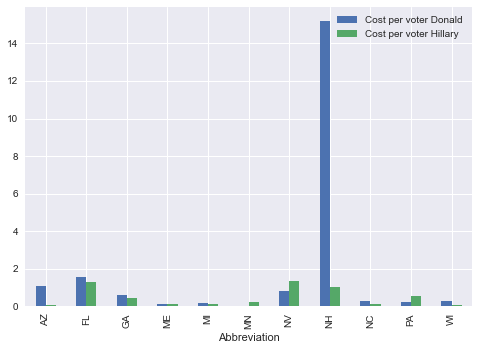

In [114]:
canditates_swing.plot(x="Abbreviation", y=["Cost per voter Donald", "Cost per voter Hillary"], kind="bar")

 Reading this [Wikipedia article](https://en.wikipedia.org/wiki/Swing_state) for swing states we can see that:
* Arizona is won by Donald, also having spent more for each person ( 1.07 against 0.07)
* Florida is won by Donald, also having spent more for each person ( 1.56 against 1.29)
* Georgia is won by Donald, also having spent more for each person ( 0.57 against 0.45)
* Maine is won by Hillary,however they almost spent the same ammout per person ( 0.10 against 0.14)
* Michigan is won by Donald , also almost same ammount per person ( 0.10 against 0.16)
* Minessota is won by Hillary, also having spent almost the same ammount ( 0.22 against 0.03)
* Nevada is won by Hillary ,where also she spent more than Donald Trump ( 1.35 against 0.82)
* New Hampshire seems to be a suprise since Donald spent way more than Hillary ( 1.02 against 15.17) but was won by Hillary Clinton.
* North Carolina is won by Donald Trump who spent more than Hillary ( 0.27 against 0.10)
* Pennsylvania is won by Donald Trump even tho. Hillary's ammount was doubled from Trumps ( 0.22 against 0.51)
* Wisconsin is won by Donald Trump who spent more than Hillary did (0.29 against 0.06)


What we see is that states that more money were spend per person,had higher changes to be won. <br />
However that's not a absolute ,since we saw from *New Hampshire* that even though Donald's ammount were a lot highter than Hillary,he still lost that State.But not also in *New Hampshire* and other states such Maine,even tho. the difference was a tiny ammount.  <br />
The swing state cost per person is almost similar for each canditate. <br />
Perhaps the cost is not the only thing that matter,even tho. it helps.Other reasons such as the history of the state with each party or the type of campaign occured on each state,plays also a big part on the final decision.